## <center>Universidade Estadual de Campinas <br/>Instituto de Computação<br/><br/>Introdução às Metodologias para Elaboração de Projeto de Pesquisa (MO911)<br/><br/>Professor: Sandro Rigo<center/>

### Trabalho 2<br/><br/>Nome: Guilherme Monteiro Oliveira - 108318

O dataset foi obtido no [Kaggle](https://www.kaggle.com/datasets/meirnizri/covid19-dataset), o qual se trata de um dataset de covid, disponibilizado pelo governo mexicano. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("Covid Data.csv")

In [3]:
df.shape

(1048575, 21)

## Análise Exploratória

Nas variáveis booleanas, 1 significa "sim" e 2 significa "não". valores como 97 e 99 são dados como ausentes.

In [4]:
for col in df.columns:
    print(df[col].value_counts())
    print('\n')

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

Removendo valores de 99, 98 e 97 por vazio:

In [5]:
df.select_dtypes('int64')

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


In [6]:
df2 = df.select_dtypes('int64').drop(['AGE'], axis=1).replace({97: np.nan, 98: np.nan, 99: np.nan})

In [7]:
df2['DATE_DIED'] = df['DATE_DIED'].replace({'9999-99-99': np.nan})
df2['AGE'] = df['AGE']

In [8]:
for col in df.columns:
    print(df2[col].value_counts())
    print('\n')

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


06/07/2020    1000
07/07/2020     996
13/07/2020     990
16/06/2020     979
16/07/2020     938
              ... 
26/02/2021       1
11/02/2021       1
10/02/2021       1
01/02/2021       1
22/04/2021       1
Name: DATE_DIED, Length: 400, dtype: int64


2.0    159050
1.0     33656
Name: INTUBED, dtype: int64


2.0    892534
1.0    140038
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


2.0    513179
1.0      8131
Name: PREGNANT, dtype: int64


2.0    920248
1.0    1

Checagem de vazios na base:

In [9]:
100 * df2.isnull().sum() / df2.shape[0]

USMER                    0.000000
MEDICAL_UNIT             0.000000
SEX                      0.000000
PATIENT_TYPE             0.000000
INTUBED                 81.622106
PNEUMONIA                1.526166
PREGNANT                50.283957
DIABETES                 0.318337
COPD                     0.286389
ASTHMA                   0.284100
INMSUPR                  0.324631
HIPERTENSION             0.296021
OTHER_DISEASE            0.481129
CARDIOVASCULAR           0.293350
OBESITY                  0.289154
RENAL_CHRONIC            0.286675
TOBACCO                  0.307083
CLASIFFICATION_FINAL     0.000000
ICU                     81.637651
DATE_DIED               92.662232
AGE                      0.000000
dtype: float64

Verificação dos tipos de dados na base

In [10]:
df2.dtypes

USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
INTUBED                 float64
PNEUMONIA               float64
PREGNANT                float64
DIABETES                float64
COPD                    float64
ASTHMA                  float64
INMSUPR                 float64
HIPERTENSION            float64
OTHER_DISEASE           float64
CARDIOVASCULAR          float64
OBESITY                 float64
RENAL_CHRONIC           float64
TOBACCO                 float64
CLASIFFICATION_FINAL      int64
ICU                     float64
DATE_DIED                object
AGE                       int64
dtype: object

Converter a variável **DATE_DIED** para data

In [11]:
df2['DATE_DIED'] = pd.to_datetime(df2['DATE_DIED'], format = "%d/%m/%Y")

In [12]:
df2.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DATE_DIED,AGE
0,2,1,1,1,NaN,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,2020-05-03,65
1,2,1,2,1,NaN,1.0,NaN,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,2020-06-03,72
2,2,1,2,2,1.0,2.0,NaN,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,2020-06-09,55
3,2,1,1,1,NaN,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2020-06-12,53
4,2,1,2,1,NaN,2.0,NaN,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,2020-06-21,68


### Histograma de mortes por gênero e idade

In [13]:
deaths = (~ df2['DATE_DIED'].isna())

In [14]:
df2[deaths].query('SEX == 1')

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DATE_DIED,AGE
0,2,1,1,1,NaN,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,2020-05-03,65
3,2,1,1,1,NaN,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2020-06-12,53
151,1,2,1,2,NaN,NaN,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2020-02-26,1
153,1,2,1,2,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2020-05-08,0
320,1,3,1,2,NaN,NaN,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,2.0,6,NaN,2020-01-13,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047628,1,13,1,1,NaN,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN,2020-07-08,82
1047629,1,13,1,2,2.0,1.0,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,2020-07-08,85
1047632,1,13,1,1,NaN,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,2020-07-10,63
1047634,1,13,1,2,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,2020-07-15,79


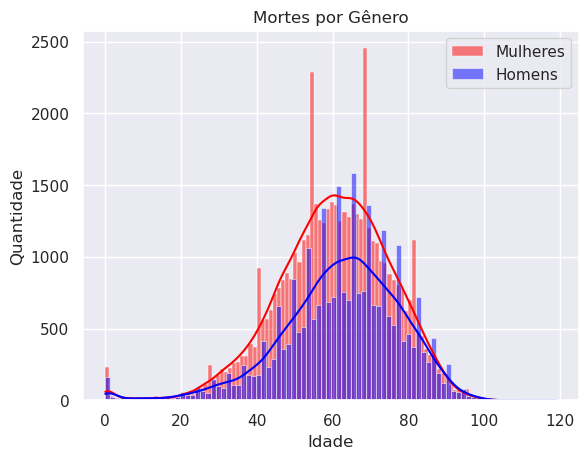

In [15]:
sns.set(style="darkgrid")

sns.histplot(data=df2[deaths].query('SEX == 2'), x="AGE", color="red", label="Mulheres", kde=True)
sns.histplot(data=df2[deaths].query('SEX == 1'), x="AGE", color="blue", label="Homens", kde=True)

plt.title('Mortes por Gênero')
plt.ylabel('Quantidade')
plt.xlabel('Idade')

plt.legend() 
plt.show()

### Quantidade de mortes

In [16]:
week = df2.DATE_DIED.dt.isocalendar().week.astype(str).str.rjust(width=3, fillchar='0')

In [17]:
year = df2.DATE_DIED.dt.isocalendar().year

In [18]:
year_week = year.map(str) + '_' + week.map(str)

In [19]:
year_week = year_week.replace('<NA>_<NA>', np.nan)

In [20]:
counts = year_week.value_counts()

In [21]:
counts.sort_index(inplace = True)

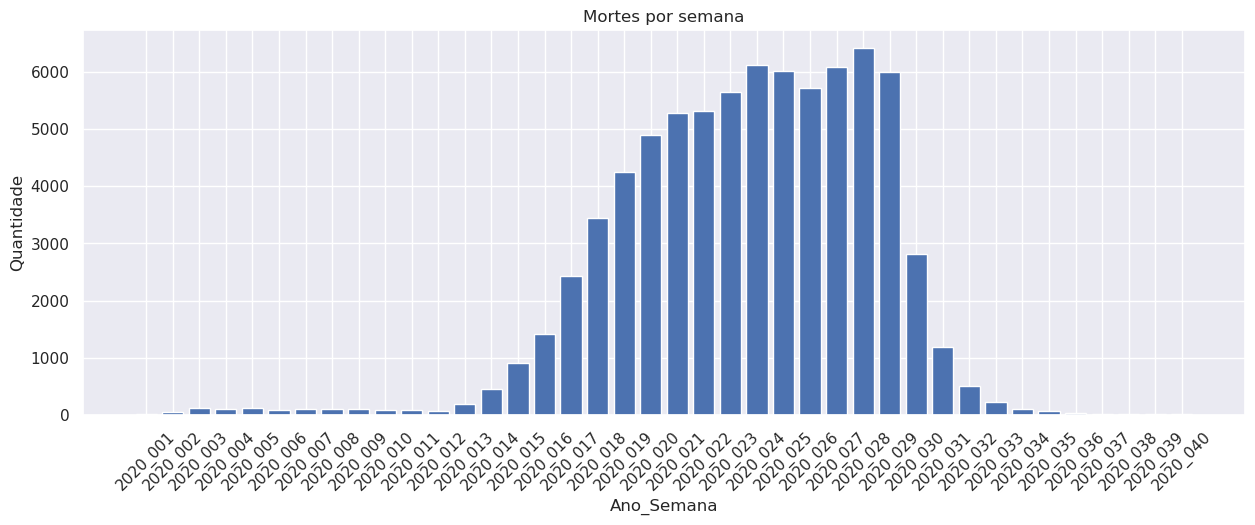

In [31]:
fig, ax = plt.subplots(figsize = (15, 5))

ax.bar(counts.index[:40], counts.values[:40])
plt.xticks(rotation = 45)

plt.ylabel('Quantidade')
plt.xlabel('Ano_Semana')

plt.title('Mortes por semana')

plt.show()

### Dispersão da idade dos pacientes por unidade médica

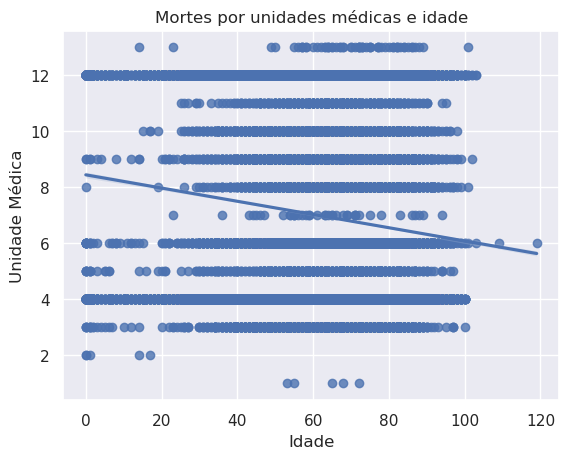

In [36]:
sns.regplot(x=df2[deaths]["AGE"], y=df2[deaths]["MEDICAL_UNIT"])

plt.title('Mortes por unidades médicas e idade')
plt.ylabel('Unidade Médica')
plt.xlabel('Idade')

plt.show()